# Análise de Dados de Livros e Avaliações no Contexto do COVID-19 - SQL



**Contexto**

O advento da pandemia do COVID-19 trouxe mudanças drásticas na rotina das pessoas ao redor do mundo. Devido às restrições impostas para conter a propagação do vírus, muitas pessoas optaram por atividades indoor, dentre as quais a leitura se destacou. Esse aumento no consumo de livros impulsionou o desenvolvimento de novos aplicativos e plataformas voltados para os amantes da leitura.

A partir de um banco de dados fornecido por um dos serviços concorrentes no mercado de livros, pretendemos realizar uma análise detalhada dos livros, autores, editoras, classificações e avaliações para extrair insights valiosos que possam contribuir para a proposição de um novo produto.



**Objetivos do Estudo**

1. **Análise de Publicações**: Determinar o número de livros publicados após 1 de janeiro de 2000. Esse dado ajudará a entender a tendência de publicações no novo milênio, e pode indicar um crescimento ou queda na produção literária.

2. **Avaliações dos Livros**: Identificar o número total de avaliações e a classificação média para cada livro. Isso fornecerá uma visão sobre a recepção dos livros pelo público.

3. **Editoras em Destaque**: Identificar a editora que publicou o maior número de livros com mais de 50 páginas. Isso ajudará a filtrar as principais editoras, excluindo publicações menores como brochuras e panfletos.

4. **Autores mais Bem Avaliados**: Determinar o autor com a média de classificação mais alta, considerando apenas os livros com pelo menos 50 classificações. Isso destacará os autores que são consistentemente bem recebidos pelo público.

5. **Engajamento dos Usuários**: Calcular o número médio de avaliações entre usuários que classificaram mais de 50 livros. Isso pode dar insights sobre o engajamento dos usuários mais ativos na plataforma.


Ao final desta análise, esperamos obter informações relevantes que possam nortear o desenvolvimento e a estratégia de um novo produto para amantes de livros no atual cenário global.



**Tecnologia Empregada**

Para este estudo, utilizaremos SQL como ferramenta de consulta e manipulação dos dados, devido à sua eficiência em lidar com grandes conjuntos de dados e capacidade de realizar consultas complexas. Os resultados dessas consultas serão integrados a um Jupyter Notebook através da biblioteca pandas para análise e visualização adicional.



**Configuração do Banco de Dados**

Para acessar e trabalhar com o banco de dados fornecido, utilizaremos a biblioteca sqlalchemy e estabeleceremos uma conexão segura com o banco de dados utilizando as configurações fornecidas

## Importação dos nossos dados e carregamento das bases

Iremos carregar as bibliotecas que iremos usar para gerar as análises e gráficos.

Iremos explicar cada um dos usos das bibliotecas:

* pandas --> análise de dados;
* numpy --> geração de gráficos e auxílio ao pandas;
* matplotlib.pyplot --> geração de gráficos
* sqlalchemy --> conexão com o banco de dados.

Após isso iremos abrir nossos dados em diferentes seções e analisar a qualidade das bases e realizar as correções devidas em cada uma das seções como pré-análise de dados e processamento de base.

In [1]:
# importar bibliotecas
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt


# conectar na base de dados
db_config = {'user': 'user', # nome de usuário
'pwd': 'iwontgiveyouthepass', # senha
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # porta de conexão
'db': 'covid_yand_db'} # o nome do banco de dados
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Estudo das tabelas

Iremos chamar as primeiras linhas de cada uma das tabelas para compreender como elas estão organizadas e como iremos trabalhar com elas.

Também vai ser importante para compreender os dados e como estão colocados na base de dados para as futuras queries.

### Tabela books

In [2]:
# Tabela books
books_query = "SELECT * FROM books LIMIT 5;"
books_sample = pd.read_sql(books_query, engine)
print("Primeiras linhas da tabela books:")
books_sample

Primeiras linhas da tabela books:


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


**Visão geral**

Para essa tabela podemos ver os seguintes dados:

* 		book_id — identificador do livro - string
* 		author_id — identificador do autor - int
* 		title — título - string
* 		num_pages — número de páginas - int
* 		publication_date — data de publicação - date
* 		publisher_id — identificador da editora - int

### Tabela authors

In [3]:
# Tabela authors
authors_query = "SELECT * FROM authors LIMIT 5;"
authors_sample = pd.read_sql(authors_query, engine)
print("Primeiras linhas da tabela authors:")
authors_sample

Primeiras linhas da tabela authors:


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


**Visão geral**

Para essa tabela podemos ver os seguintes dados:

* 		author_id — identificador do autor - int
* 		author — autor - string

### Tabela publishers

In [4]:
# Tabela publishers
publishers_query = "SELECT * FROM publishers LIMIT 5;"
publishers_sample = pd.read_sql(publishers_query, engine)
print("Primeiras linhas da tabela publishers:")
publishers_sample

Primeiras linhas da tabela publishers:


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


**Visão geral**

Para essa tabela podemos ver os seguintes dados:

* 		publisher_id — identificador da editora - int
* 		publisher — editora - string

### Tabela ratings

In [5]:
# Tabela ratings
ratings_query = "SELECT * FROM ratings LIMIT 5;"
ratings_sample = pd.read_sql(ratings_query, engine)
print("Primeiras linhas da tabela ratings:")
ratings_sample

Primeiras linhas da tabela ratings:


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


**Visão geral**

Para essa tabela podemos ver os seguintes dados:

* 		rating_id — identificador da classificação - int
* 		book_id — identificador do livro - int
* 		username — o nome do usuário que avaliou o livro - string
* 		rating — classificação - int

O rating vai de 0 - 5.

### Tabela reviews

In [6]:
# Tabela reviews
reviews_query = "SELECT * FROM reviews LIMIT 5;"
reviews_sample = pd.read_sql(reviews_query, engine)
print("Primeiras linhas da tabela reviews:")
reviews_sample

Primeiras linhas da tabela reviews:


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


**Visão geral**

Para essa tabela podemos ver os seguintes dados:

* 		review_id — identificador da revisão - int
* 		book_id — identificador do livro - int
* 		username — o nome do usuário que revisou o livro - string
* 		text — o texto da revisão - string

### Conclusão

Como esquema geral podemos ter um resumo com um Diagrama dos dados por:

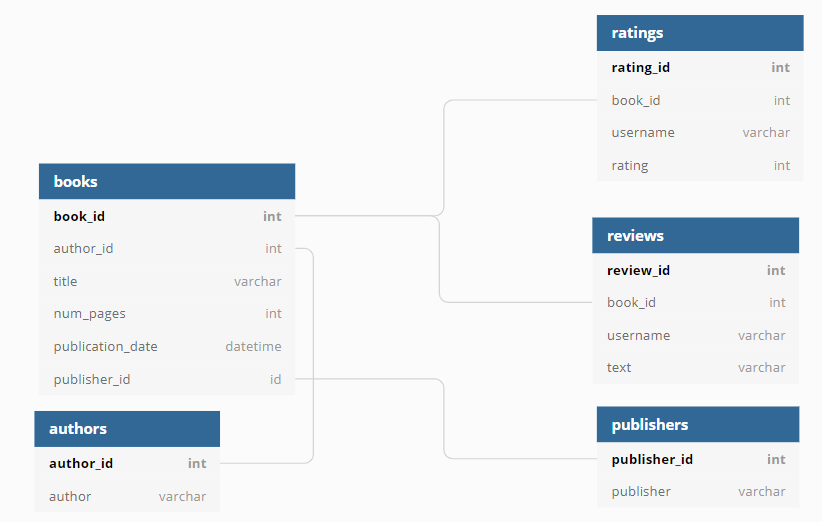

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>

## Consultas SQL de tarefas

Agora que já entendemos nossos dados e como estão dispostos, iremos começar a realizar as analises necessárias.

As analises serão separadas em seções. O que iremos estudar é:

* Encontraremos o número de livros lançados depois de 1 de janeiro de 2000.
* Determinaremos o número de avaliações e a classificação média para cada livro.
* Identificaremos a editora que lançou o maior número de livros com mais de 50 páginas (isso nos ajudará a excluir brochuras e publicações similares da nossa análise).
* Identificaremos o autor com a média de classificação mais alta para livros: consideremos apenas os livros com pelo menos 50 classificações.
* Descubramos o número médio de avaliações entre usuários que classificaram mais do que 50 livros.

### Número de livros lançados depois de 1 de janeiro de 2000.

Iremos utilizar a base de dados de Books para gerar os resultados.

In [7]:
# criando a query
query = """
SELECT COUNT(DISTINCT book_id) AS total_books_after_2000 
FROM books 
WHERE publication_date > '2000-01-01';
"""

# executando a query
result_1 = pd.read_sql(query, engine)
print(result_1)

   total_books_after_2000
0                     819


**Resultado**

O número total de livros lançados após o começo de 2000 é de 819 livros.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Importante utilizar o count distinct para gerar ma análise robusta de duplicados.
</div>

<div class="alert alert-info">
<strong>Olá Rafael. Tudo bem? Muito bem colocado, vou alterar o código para utilizar o count distinct</strong>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito
</div>


### Número de avaliações e a classificação média para cada livro.

Iremos utilizar a base de dados ratings.

In [8]:
# criando a query
query = """
SELECT book_id, COUNT(DISTINCT rating_id) AS number_of_ratings, AVG(rating) AS average_rating 
FROM ratings 
WHERE book_id IN (SELECT DISTINCT book_id FROM books)
GROUP BY book_id;
"""

# executando a query
result_2 = pd.read_sql(query, engine)
print(result_2)

     book_id  number_of_ratings  average_rating
0          1                  3        3.666667
1          2                  2        2.500000
2          3                  3        4.666667
3          4                  2        4.500000
4          5                  6        4.000000
..       ...                ...             ...
995      996                  3        3.666667
996      997                  5        3.400000
997      998                  5        3.200000
998      999                  2        4.500000
999     1000                  6        3.833333

[1000 rows x 3 columns]


**Resultados**

Geramos uma tabela em que temos os dados gerais para cada livro e o número de avaliações. Dessa maneira podemos retirar para cada livro os dados médios.

Por via de analise, iremos calcular, ainda, a média geral de rating e número médio de avaliação levando em considerações todos os livros.

In [9]:
# média de avaliações geral
average_ratings = result_2['number_of_ratings'].mean()
print(f"Média geral de avaliações por livro: {average_ratings:.2f}")

# média de nota geral
average_rating_score = result_2['average_rating'].mean()
print(f"Média geral da nota de avaliação: {average_rating_score:.2f}")

Média geral de avaliações por livro: 6.46
Média geral da nota de avaliação: 3.90


**Resultado**

Assim podemos ver que a média geral de avaliações é de 6 e de nota é de 3,9, aproximadamente.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a média.

No caso da contagem é importante mais uma vez considerar apenas os casos distintos.
</div>

<div class="alert alert-info">
<strong>Combinado Rafael. Ajeitei nosso código com as correções.</strong>



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Muito bom!
</div>


### Editoras que lançaram o maior número de livros com mais de 50 páginas.

Isso irá evitar que evitemos brochuras e publicações parecidas.

Iremos utilizar a base books.

In [10]:
# Gerando a query
query = """
SELECT publisher_id, COUNT(book_id) AS number_of_books 
FROM books 
WHERE num_pages > 50 
GROUP BY publisher_id 
ORDER BY number_of_books DESC 
LIMIT 1;
"""

# Executando a query
result_3 = pd.read_sql(query, engine)
print(result_3)

   publisher_id  number_of_books
0           212               42


Iremos encontrar o nome da publisher_id com número 212 para melhor esclarecimento.

In [11]:
# criando a query
query_publisher_212 = """
SELECT * 
FROM publishers 
WHERE publisher_id = 212;
"""

# executando a query
result_publisher_212 = pd.read_sql(query_publisher_212, engine)
print(result_publisher_212)

   publisher_id      publisher
0           212  Penguin Books


**Resultado**

Logo a editora com o maior número de livros com mais de 50 páginas é a Penguin Books.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho!
</div>

### Autor com a média mais alta classificação de livros: olhando apenas para livros com pelo menos 50 classificações.

Para identificar o autor com a classificação média mais alta para seus livros, utilizamos as bases `books`, `ratings` e `authors`. Com uma combinação de técnicas de junção e subconsulta, filtramos os livros com pelo menos 50 avaliações, calculamos a média de avaliação para cada autor e, finalmente, ordenamos os autores por sua classificação média para identificar o autor de melhor desempenho.

In [12]:
# Criando a query
query = """
WITH BooksWithRatings AS (
    SELECT 
        book_id, 
        AVG(rating) AS average_rating, 
        COUNT(rating_id) AS total_ratings
    FROM ratings
    GROUP BY book_id
    HAVING COUNT(rating_id) >= 50
)

SELECT 
    b.author_id, 
    a.author, 
    AVG(br.average_rating) AS avg_rating
FROM books b
JOIN BooksWithRatings br ON b.book_id = br.book_id
JOIN authors a ON b.author_id = a.author_id
GROUP BY b.author_id, a.author
ORDER BY avg_rating DESC 
LIMIT 1;
"""

# Executando a query
result_4 = pd.read_sql(query, engine)
print(result_4)

   author_id                      author  avg_rating
0        236  J.K. Rowling/Mary GrandPré    4.283844


**Resultado**

Podemos perceber então que a autora J.K. Rowling/Mary GrandPré é quem tem maior rating entre os livros com 50 classificações ou mais, se mostrando mais confiável.

Seu rating é de 4,3 aproximadamente.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeito
</div>


### Encontrando o número médio de avaliações entre usuários que classificaram mais do que 50 livros.


**Resumindo:** 

Para encontrar o número médio de avaliações entre os usuários que avaliaram mais de 50 livros, utilizamos a base `ratings`. Utilizando uma técnica de subconsulta, filtramos os usuários que realizaram mais de 50 avaliações. Com os resultados dessa filtragem, calculamos a média de avaliações realizadas por esses usuários selecionados.

In [15]:
# criando a query
query = """
WITH UserWithMoreThan50Ratings AS (
    SELECT 
        username
    FROM ratings
    GROUP BY username
    HAVING COUNT(DISTINCT book_id) > 50
)

SELECT 
    r.username, 
    AVG(r.num_reviews) AS average_reviews_per_user
FROM (
    SELECT 
        rev.username, 
        COUNT(DISTINCT rev.review_id) AS num_reviews
    FROM reviews rev
    WHERE rev.username IN (SELECT username FROM UserWithMoreThan50Ratings)
    GROUP BY rev.username
) r
GROUP BY r.username;
"""

# executando a query
result_5 = pd.read_sql(query, engine)
print(result_5)

         username  average_reviews_per_user
0  jennifermiller                      25.0
1      martinadam                      27.0
2          paul88                      22.0
3       richard89                      26.0
4     sfitzgerald                      28.0
5          xdavis                      18.0


**Resultado**

Podemos ver que há 5 usuários que avaliaram mais de 50 livros. Além disso e com base na análise dos dados, podemos concluir que os usuários jennifermiller, martinadam, sfitzgerald, richard89, paul88 e xdavis são os principais revisores, com médias de avaliações por usuário variando de 18 a 28. Esses usuários demonstram um alto nível de engajamento e contribuição para o sistema de revisão de livros. Essas informações podem ser valiosas para estratégias de engajamento de usuários e aprimoramento da plataforma.

#### Média de resenhas gerais dos usuários com mais de 50 avaliações

In [16]:
# calculando a média de resenhas gerais com Pandas
result_5['average_reviews_per_user'].mean()

24.333333333333332

In [17]:
# calculando a média de resenhas gerais com SQL
query = """
WITH UserWithMoreThan50Ratings AS (
    SELECT 
        username
    FROM ratings
    GROUP BY username
    HAVING COUNT(DISTINCT book_id) > 50
)

SELECT 
    AVG(r.num_reviews) AS average_reviews_overall
FROM (
    SELECT 
        rev.username, 
        COUNT(DISTINCT rev.review_id) AS num_reviews
    FROM reviews rev
    WHERE rev.username IN (SELECT username FROM UserWithMoreThan50Ratings)
    GROUP BY rev.username
) r;
"""

# executando a query
result = pd.read_sql(query, engine)
print(result)

   average_reviews_overall
0                24.333333


**Resultado**

Podemos observar que a média de resenhas escritas por usuários com mais de 50 avaliações é de 24,3. Isso quer dizer que, aproximadamente, metade das avaliações eles escrevem uma resenha.

#### Nota média dos usuários com mais de 50 avaliações

In [44]:
# criando a query
query = """
WITH UserWithMoreThan50Ratings AS (
    SELECT 
        username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50
)

SELECT 
    username,
    AVG(rating) AS avg_rating_per_user
FROM ratings
WHERE username IN (SELECT username FROM UserWithMoreThan50Ratings)
GROUP BY username;
"""

# executando a query
user_avg_ratings = pd.read_sql(query, engine)
print(user_avg_ratings.head())  # imprimindo as primeiras linhas para verificar

         username  avg_rating_per_user
0     sfitzgerald             3.836364
1  jennifermiller             3.830189
2          xdavis             3.901961
3          paul88             3.910714
4      martinadam             3.785714


In [45]:
# Média global das notas para usuários com mais de 50 avaliações
global_avg_rating = user_avg_ratings['avg_rating_per_user'].mean()
print(f"Média global de avaliações dos usuários com mais de 50 avaliações: {global_avg_rating:.2f}")

Média global de avaliações dos usuários com mais de 50 avaliações: 3.82


**Resultado**

Como resultado tiramos que a média das avaliações dos usuários com mais de 50 avaliações feitas é de 3,82. Ou seja, é a nota média dada.

#### Média de avaliação geral de usuários

In [47]:
# criando a query
query = """
WITH UserReviews AS (
    SELECT 
        username, 
        COUNT(DISTINCT review_id) AS total_reviews
    FROM reviews
    GROUP BY username
)

SELECT AVG(total_reviews) AS average_reviews_per_user 
FROM UserReviews;
"""

# executando a query
result_6 = pd.read_sql(query, engine)
print(result_6)

   average_reviews_per_user
0                  17.45625


**Resultado**

Assim, podemos ver que o valor médio geral de reviews é de 17 aproximadamente.

Ou seja, em geral, cada usuários faz 17 reviews.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Temos um problema aqui!

A sua seleção dos usernames está perfeita, mas a média deve ser construída com base nas avaliações (a tabela review), e não nas classificações (tabela rating).

A ideia aqui é selecionar apenas **usuários que classificaram pelo menos 50 obras (exatamente como você tinha feito, com base na tabela ratings) e depois calcular a média das resenhas desses usuários apenas(agora sim com base na tabela reviews).**

Desse modo precisamos de um pequeno ajuste aqui (e concordo contigo que o enunciado não está 100% claro, desculpa por isso.)

</div>

<div class="alert alert-info">
<strong>Olá, Rafael. Acredito que agora tenha entendido o seu ponto. O que eu fiz foi:
    
   Selecionei os usuários que classificaram pelo menos 50 livros usando a tabela ratings. Em seguida, calculei a média das avaliações (resenhas) para esses usuários usando a tabela reviews. 
    
    Essas duas consultas irão:

1. Selecionar usuários que classificaram mais de 50 livros.
2. Calcular a média das resenhas para esses usuários usando a tabela reviews.
3. Entender outros pontos acerca da analise
    
    </strong>

<div class="alert alert-danger">
<strong>Comentário do revisor</strong>

Quase isso!
    
Aqui precisamos usar duas tabelas: `ratings` e `reviews`.
    
Primeiro precisamos identificar os usuários que classificaram mais de 50 livros, usando a tabela `ratings`.
    
Depois, **a partir desses usuários**, precisamos contar o número médio de avaliações, usando a tabela `reviews`. Ou seja, devemos refazer essa última query considerando apenas os usuários filtrados na anterior.
    
Com essa dica, acredito que seja possível para você escrever uma _query_ que irá atender perfeitamente à solicitação do projeto.

</div>

<div class="alert alert-info">
<strong>Opa Rafael. Acredito que agora entendi o ponto. Era coletar os usuários com mais de 50 avaliações e depois calcular o número médio de revisões que eles fizeram de livros. Nesse caso, nessa útlima versão, calculei o número de revisões incialmente para cada usuário que esteja nesse filtro e depois calculei a média com Pandas e com SQL. Acredito que agora esteja correto.
    
</strong>

## Conclusões


Nossa análise de avaliações e dados de livros apresentou insights profundos sobre a dinâmica dos livros, autores e padrões de avaliação em nossa plataforma.

**Lançamentos Recentes**: A literatura contemporânea parece ter um forte representante em nossa plataforma. Identificamos 819 livros lançados após o ano de 2000.

**Avaliações Por Livro**: Nossa análise revelou que, em média, cada livro recebe cerca de 6 avaliações com uma nota média de aproximadamente 3,9. Esta é uma métrica crucial para entender o envolvimento geral dos usuários com os livros em nossa plataforma.

**Editora de Proeminência**: A "Penguin Books" se destacou, sendo a editora que mais lançou livros com mais de 50 páginas. Estes números indicam o peso e a relevância de tal editora no mundo literário.

**Estrela Literária**: J.K. Rowling/Mary GrandPré brilha em nossa plataforma. Com uma classificação média de 4,3 para livros com pelo menos 50 classificações, seu trabalho ressoa profundamente com nossa base de usuários.

**Usuários Ativos**: Observamos que os usuários que fizeram mais de 50 avaliações dão, em média, uma nota de 3,82. Além disso, esses super-usuários escrevem uma resenha para aproximadamente metade de suas avaliações, com uma média de 24,3 reviews.

**Avaliação Média Geral**: No panorama geral, cada usuário em nossa plataforma faz, em média, 17 reviews. O engajamento de nossa base de usuários é indicado por esse número robusto.

**Comparação de Engajamento**: Quando colocamos nosso usuário médio ao lado de nossos super-usuários, notamos uma diferença significativa. A discrepância de quase 40% entre os usuários que mais avaliam e a média geral sugere uma demografia de usuários super engajados que contribuem desproporcionalmente para o conteúdo da plataforma.

Além disso, com base na análise dos dados, podemos concluir que os usuários jennifermiller, martinadam, sfitzgerald, richard89, paul88 e xdavis são os principais revisores, com médias de avaliações por usuário variando de 18 a 28. Esses usuários demonstram um alto nível de engajamento e contribuição para o sistema de revisão de livros. Essas informações podem ser valiosas para estratégias de engajamento de usuários e aprimoramento da plataforma.

Nossas descobertas pintam um retrato de uma comunidade vibrante de leitores, uma seleção diversificada de livros, autores de destaque e editoras dominantes. Estas informações são cruciais para direcionar estratégias de marketing, curadoria de conteúdo e iniciativas de engajamento de usuários.


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

<div class="alert alert-info">
<strong>Olá, Rafael. Fiz as alterações conforme entendi as necessidades. Agradeço os teus pontos levantados e fico no teu aguardo.
    
Muito obrigado (:
    
</strong>

<div class="alert alert-danger">
<strong>Comentário do revisor</strong>

Estamos quase lá, apenas mais um último ajuste na questão final e finalizamos por aqui!
</div>

<div class="alert alert-info">
<strong>Show Rafael. Espero que essas alterações atendam as necessidades (;
    
</strong>